### 2.5 데이터프레임 데이터 조작

In [33]:
import numpy as np
import pandas as pd

- 데이터 갯수 세기: count()

In [34]:
np.random.seed(2)
df = pd.DataFrame(np.random.randint(5, size=(4, 4)), dtype=float)
df.iloc[2, 3] = np.nan
df

,0,1,2,3
0,0.0,0.0,3.0,2.0
1,3.0,0.0,2.0,1.0
2,3.0,2.0,4.0,NaN
3,4.0,3.0,4.0,2.0


In [35]:
df.count() # 열 별로 NaN이 아닌 값의 갯수 세기

0    4
1    4
2    4
3    3
dtype: int64

In [81]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


- 연습 문제 4.4.1

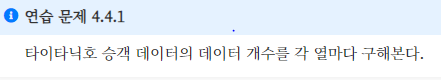

In [82]:
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

- 카테고리값 세기: value_counts()

In [38]:
titanic['class'].value_counts()     # 예약어는 []를 사용해야한다.

Third     491
First     216
Second    184
Name: class, dtype: int64

In [39]:
titanic.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

- 정렬: sort_values(), sort_index()

In [40]:
np.random.seed(2023)
df = pd.DataFrame(np.random.randint(40, 101, size=(4, 5)),
                    index=list('abcd'), columns=list('VWXYZ'))
df

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
c,77,72,62,57,87
d,93,87,53,79,45


In [41]:
# W 컬럼 오름차순 기준
df.sort_values(by='W')

,V,W,X,Y,Z
b,68,43,92,92,62
a,63,65,46,95,73
c,77,72,62,57,87
d,93,87,53,79,45


In [42]:
# Y 컬럼 내림차순 기준, Y컴럼에 동일한 값이 있으면 Z 컬럼의 내림차순
df2 = df.sort_values(by=['Y', 'Z'], ascending=False)
df2

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
d,93,87,53,79,45
c,77,72,62,57,87


In [43]:
df2.sort_index()

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
c,77,72,62,57,87
d,93,87,53,79,45


![Alt text](image.png)

In [44]:
print(titanic.sex.value_counts())
print(titanic.alive.value_counts())

male      577
female    314
Name: sex, dtype: int64
no     549
yes    342
Name: alive, dtype: int64


In [45]:
# 연속적인 값에 대해서 value_counts()를 하는 것은 바람직하지 않음
titanic.age.value_counts().head()

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: age, dtype: int64

- 행/열 합계

In [46]:
df

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
c,77,72,62,57,87
d,93,87,53,79,45


In [48]:
# 행의 합계
df['행합계'] = df.sum(axis=1)
df

,V,W,X,Y,Z,행합계
a,63,65,46,95,73,342
b,68,43,92,92,62,357
c,77,72,62,57,87,355
d,93,87,53,79,45,357


In [49]:
# 행의 평균
df['행평균'] = df[list('VWXYZ')].mean(axis=1)
df

,V,W,X,Y,Z,행합계,행평균
a,63,65,46,95,73,342,68.4
b,68,43,92,92,62,357,71.4
c,77,72,62,57,87,355,71.0
d,93,87,53,79,45,357,71.4


In [50]:
# 행의 평균 2
df['행평균2'] = df.iloc[:, :5].mean(axis=1)  #행전부, 열은 5번째까지
df

,V,W,X,Y,Z,행합계,행평균,행평균2
a,63,65,46,95,73,342,68.4,68.4
b,68,43,92,92,62,357,71.4,71.4
c,77,72,62,57,87,355,71.0,71.0
d,93,87,53,79,45,357,71.4,71.4


In [51]:
# 행 추가하는 방법: 열 합계
df.loc['열합계', :] = df.sum(axis=0)  #axis=0은 생략가능(디폴트임)
df

,V,W,X,Y,Z,행합계,행평균,행평균2
a,63.0,65.0,46.0,95.0,73.0,342.0,68.4,68.4
b,68.0,43.0,92.0,92.0,62.0,357.0,71.4,71.4
c,77.0,72.0,62.0,57.0,87.0,355.0,71.0,71.0
d,93.0,87.0,53.0,79.0,45.0,357.0,71.4,71.4
열합계,301.0,267.0,253.0,323.0,267.0,1411.0,282.2,282.2


![Alt text](image-1.png)

In [83]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [86]:
#1. 타이타닉호 승객의 평균 나이를 구하라.
titanic.age.mean().round(2)

29.7

In [87]:
#2. 타이타닉호 승객중 여성 승객의 평균 나이를 구하라.
tf = titanic[titanic.sex == 'female']       # 필터링
tf.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [88]:
titanic[titanic.sex == 'female'].age.mean().round(2)

27.92

In [89]:
#3. 타이타닉호 승객중 1등실 선실의 여성 승객의 평균 나이를 구하라.
tf1 = tf[tf.pclass == 1]
tf1.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [90]:
tf1.age.mean().round(2)

34.61

In [91]:
titanic[(titanic.pclass == 1) & (titanic.sex == 'female')].age.mean().round(2)

34.61

- apply 변환

In [93]:
np.random.seed(2023)
df = pd.DataFrame(np.random.randint(40, 101, size=(4, 5)), 
                  index=list('abcd'), columns=list('VWXYZ'))
df

,V,W,X,Y,Z
a,63,65,46,95,73
b,68,43,92,92,62
c,77,72,62,57,87
d,93,87,53,79,45


df.apply(lambda x:)  : 아무 정의도 안하면 x는 열  <br>
df.sex.apply(lambda x:) : x는 시리즈의 하나의 엘리먼트  <br>
- 앞뒤사항을 봐야 x의 값을 정의할 수 있음

In [94]:
# 각 열에서 최대값 - 최소값
df.apply(lambda x: x.max() - x.min())  # x는 각 column을 의미

V    30
W    44
X    46
Y    38
Z    42
dtype: int64

In [95]:
# V 열의 제곱수
df.V.apply(lambda x: x*x)       # x는 V열의 각 element(엘리먼트)

a    3969
b    4624
c    5929
d    8649
Name: V, dtype: int64

![Alt text](image-3.png)
(https://kevinitcoding.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%94%84%EB%A0%88%EC%9E%84%EC%97%90-%ED%95%A8%EC%88%98-%EC%A0%81%EC%9A%A9-map-apply-applymap-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC)
- map (함수, 리스트)
- Series/DF
- Series.apply(함수)
- DF.apply(함수) x: 열
- DF.apply(함수, axis=1) x: 행
- 한줄에 만들수 없으면 함수를 만들어야 하고 한줄에 만들 수 있으면 그렇게 해라(세훈이꺼 뺏김)

In [98]:
# 각 행의 최대값 - 최소값 한 결과 - axis = 1을 주면 됨
df.apply(lambda x:x.max() - x.min(), axis=1)

a    49
b    49
c    30
d    48
dtype: int64

In [99]:
# 다음과 같이 타이타닉호의 승객 중 나이 20살을 기준으로 성인(adult)과 미성년자(child)를 구별
titanic['adult/child'] = titanic.apply(lambda x:'adult' if x.age >=20 else 'child', axis=1)  # 값이 행의 갯수가 나와야함
titanic.tail()      #tail() 끄트머리만.. 보겠다

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult


![Alt text](image-2.png)

In [108]:
# 20살이 넘으면 성별을 그대로 사용한다.
# 20살 미만이면 성별에 관계없이 “child”라고 한다.
titanic['category1'] = titanic.apply(lambda x: x.sex if x.age >= 20 else 'child', axis=1)
titanic.tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,adult/child,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,adult,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,adult,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,adult,male


In [109]:
data = {
    'text': ['03.입출력.ipynb', '04.고급인덱싱.ipynb', '05.데이터조작.ipynb'],
    'price': ['24,000', '36,000', '42,000']
}
df1 = pd.DataFrame(data)
df1

,text,price
0,03.입출력.ipynb,"24,000"
1,04.고급인덱싱.ipynb,"36,000"
2,05.데이터조작.ipynb,"42,000"


In [110]:
# 구둣점 제거 열 생성
df1['구둣점 제거'] = df1.text.apply(lambda x: x.replace('.', ''))       # x : 모든 엘리먼트에 대해 적용
df1

,text,price,구둣점 제거
0,03.입출력.ipynb,"24,000",03입출력ipynb
1,04.고급인덱싱.ipynb,"36,000",04고급인덱싱ipynb
2,05.데이터조작.ipynb,"42,000",05데이터조작ipynb


In [118]:
# 한글 텍스트 열 생성               #regex (레귤러 익스프레션)
df1['한글 텍스트'] = df1.text.apply(lambda x: x.replace('[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]', ''))
df1

,text,price,구둣점 제거,한글 텍스트
0,03.입출력.ipynb,"24,000",03입출력ipynb,03.입출력.ipynb
1,04.고급인덱싱.ipynb,"36,000",04고급인덱싱ipynb,04.고급인덱싱.ipynb
2,05.데이터조작.ipynb,"42,000",05데이터조작ipynb,05.데이터조작.ipynb


In [ ]:
# price 문자열을 정수로 변환하여 가격 열 생성
df['가격'] = df.price.apply(lambda x: int(x.replace(',','')))

In [119]:
x = '12,000'
int(x.replace(',',''))

12000